In [1]:
from medmnist import PneumoniaMNIST

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

import numpy as np
import random

In [2]:
train_dataset = PneumoniaMNIST(split="train", download=True)
validation_dataset = PneumoniaMNIST(split="val", download=True)
test_dataset = PneumoniaMNIST(split="test", download=True)

In [3]:
train_dataset


Dataset PneumoniaMNIST of size 28 (pneumoniamnist)
    Number of datapoints: 4708
    Root location: C:\Users\bigma\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0

In [4]:
type(train_dataset)

medmnist.dataset.PneumoniaMNIST

In [5]:
img, label = train_dataset[0]
print(f"Type of image: {type(img)}")
# print(f"Shape of image: {img.shape}")

Type of image: <class 'PIL.Image.Image'>


In [6]:
# based on Windsurf prompt: "how to convert PIL.Image.Image to a numpy array"

# Get a sample image from the dataset
img, label = train_dataset[0]  # Get first sample

x_train = np.array(img)

print(f"Shape of numpy array: {x_train.shape}")

Shape of numpy array: (28, 28)


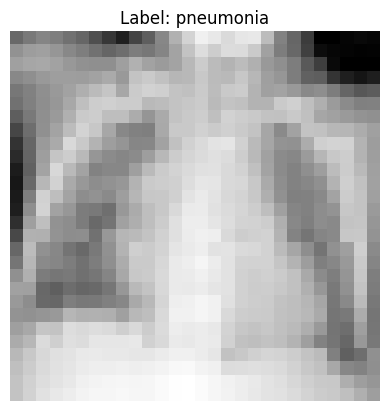

Pixel values:
[ 92 108 117 111 101  90  70  49  28  60  83 119 156 186 211 204 192 203
 204 166 115  90  53   0   0   5   8   6]


In [7]:
# based on Windsurf prompt: "how to plot the first sample image from train_dataset"

# Get the first sample
img_tensor, label = train_dataset[0]

# Convert tensor to numpy array
img_array = np.array(img_tensor)

# Plot the image
plt.imshow(img_array, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title(f"Label: {'pneumonia' if label.item() == 1 else 'normal'}")
plt.axis('off')  # Hide axis
plt.show()

# If you want to see the raw pixel values
print("Pixel values:")
print(img_array[0])

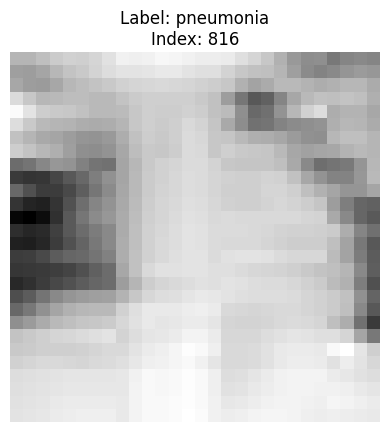

Image shape: (28, 28)
Label (0=normal, 1=pneumonia): 1


In [8]:
# based on Windsurf prompt: "how to plot a random image from train_dataset"

# Get a random index
random_idx = random.randint(0, len(train_dataset) - 1)

# Get the random sample
img_tensor, label = train_dataset[random_idx]

# Convert tensor to numpy array
img_array = np.array(img_tensor)

# Plot the image
plt.imshow(img_array, cmap='gray')
plt.title(f"Label: {'pneumonia' if label.item() == 1 else 'normal'}\nIndex: {random_idx}")
plt.axis('off')
plt.show()

# Print additional info about the sample
print(f"Image shape: {img_array.shape}")
print(f"Label (0=normal, 1=pneumonia): {label.item()}")

In [9]:
train_dataset

Dataset PneumoniaMNIST of size 28 (pneumoniamnist)
    Number of datapoints: 4708
    Root location: C:\Users\bigma\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0

In [10]:
# based on Windsurf prompt: "how to get a numpy ndarray of x_train images and y_train labels from train_dataset of type medmnist.dataset.PneumoniaMNIST"

# Initialize lists to store images and labels
images = []
labels = []

# Loop through the dataset
for img_tensor, label in train_dataset:
    # Convert tensor to numpy array and append
    images.append(np.array(img_tensor))
    labels.append(label.item())  # Convert tensor to scalar

# Convert lists to numpy arrays
x_train = np.stack(images)  # Stack images into a single array
y_train = np.array(labels)  # Convert labels list to array

x_train = np.expand_dims(x_train, axis=-1)

# Check shapes
print(f"x_train shape: {x_train.shape}")  # Should be (4708, 28, 28, 1)
print(f"y_train shape: {y_train.shape}")  # Should be (4708,)

# TODO: If you want to flatten the images for machine learning
# x_train_flattened = x_train.reshape(x_train.shape[0], -1)  # Shape will be (4708, 784)

x_train shape: (4708, 28, 28, 1)
y_train shape: (4708,)


In [11]:
# Initialize lists to store images and labels
images = []
labels = []

# Loop through the dataset
for img_tensor, label in validation_dataset:
    # Convert tensor to numpy array and append
    images.append(np.array(img_tensor))
    labels.append(label.item())  # Convert tensor to scalar

# Convert lists to numpy arrays
x_validation = np.stack(images)  # Stack images into a single array
y_validation = np.array(labels)  # Convert labels list to array

x_validation = np.expand_dims(x_validation, axis=-1)

# Check shapes
print(f"x_validation shape: {x_validation.shape}")  # Should be (4708, 28, 28, 1)
print(f"y_validation shape: {y_validation.shape}")  # Should be (4708,)

x_validation shape: (524, 28, 28, 1)
y_validation shape: (524,)


In [12]:
# Normalize image pixel values to [0, 1]
if x_train.max() > 1:
    x_train = x_train.astype(np.float32) / 255.0
    
if x_validation.max() > 1:
    x_validation = x_validation.astype(np.float32) / 255.0

### Baseline implementation

Uses a dense neural network with 2 hidden layers of 8 neurons each, like from early DNN examples from class and like projects 2 and 3.

These choices led to a trainable parameter count of 6361, which is larger than the number of images in the training set (4708).

In [13]:
# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'), # TODO: Try with fewer hidden layers and neurons.
    Dense(1, activation='sigmoid')]) # sigmoid for binary classification.

# TODO: Consider trying BinaryFocalCrossentropy also: https://keras.io/api/losses/probabilistic_losses/#binaryfocalcrossentropy-class
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

model.summary()

c:\Users\bigma\.virtualenvs\Pneumonia-Detection-1PsfeFAi\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,361 (24.85 KB)

 Trainable params: 6,361 (24.85 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)


(4708, 28, 28, 1)
(4708,)
(524, 28, 28, 1)
(524,)


In [15]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation))

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7841 - loss: 0.4530 - val_accuracy: 0.9008 - val_loss: 0.2472
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9098 - loss: 0.2306 - val_accuracy: 0.9370 - val_loss: 0.1865
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9207 - loss: 0.1936 - val_accuracy: 0.9485 - val_loss: 0.1654
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9303 - loss: 0.1797 - val_accuracy: 0.9542 - val_loss: 0.1538
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9324 - loss: 0.1719 - val_accuracy: 0.9523 - val_loss: 0.1466
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9319 - loss: 0.1669 - val_accuracy: 0.9504 - val_loss: 0.1415
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9347 - loss: 0.1632 - val_accuracy: 0.9523 - val_loss: 0.1377
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9352 - loss: 0.1604 - val_accuracy: 0.

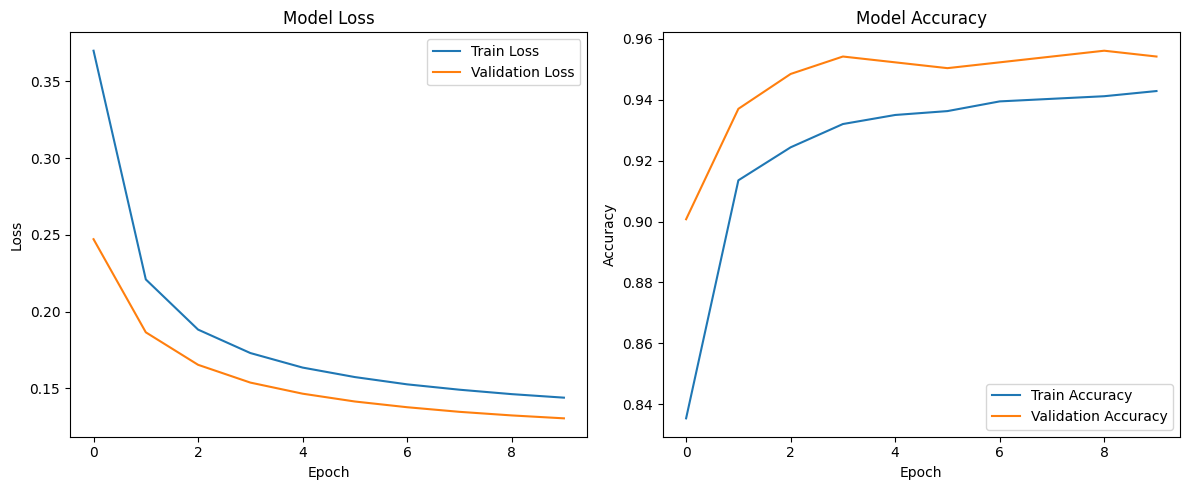

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Class distribution in y_train:
Class normal (label 0): 1214 samples
Class pneumonia (label 1): 3494 samples

Using pandas:
1    3494
0    1214
Name: count, dtype: int64
1    74.214104
0    25.785896
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


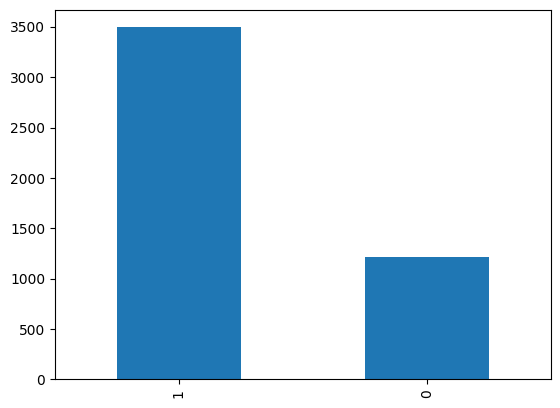

In [17]:
# Get unique values and their counts
unique_values, counts = np.unique(y_train, return_counts=True)

# Create a dictionary of counts
class_counts = dict(zip(unique_values, counts))

# Print the counts
print(f"Class distribution in y_train:")
for class_id, count in class_counts.items():
    class_name = 'normal' if class_id == 0 else 'pneumonia'
    print(f"Class {class_name} (label {class_id}): {count} samples")

# Alternative way using pandas
import pandas as pd
y_train_df = pd.Series(y_train)
print("\nUsing pandas:")
print(y_train_df.value_counts())
percentage_df = y_train_df.value_counts(normalize=True) * 100
print(percentage_df)
print(y_train_df.value_counts().plot(kind='bar'))


Class distribution in y_validation:
Class normal (label 0): 135 samples
Class pneumonia (label 1): 389 samples

Using pandas:
1    389
0    135
Name: count, dtype: int64
1    74.236641
0    25.763359
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


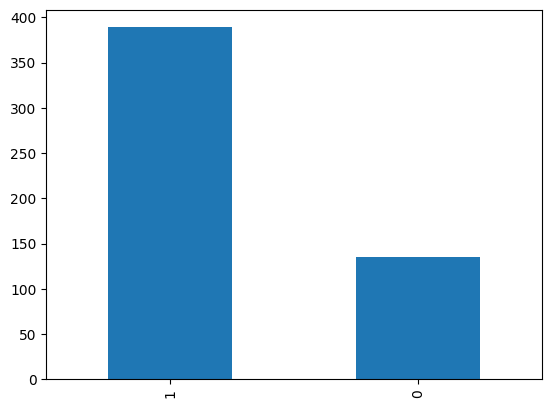

In [18]:
# Get unique values and their counts
unique_values, counts = np.unique(y_validation, return_counts=True)

# Create a dictionary of counts
class_counts = dict(zip(unique_values, counts))

# Print the counts
print(f"Class distribution in y_validation:")
for class_id, count in class_counts.items():
    class_name = 'normal' if class_id == 0 else 'pneumonia'
    print(f"Class {class_name} (label {class_id}): {count} samples")

# Alternative way using pandas
import pandas as pd
y_validation_df = pd.Series(y_validation)
print("\nUsing pandas:")
print(y_validation_df.value_counts())
percentage_df = y_validation_df.value_counts(normalize=True) * 100
print(percentage_df)
print(y_validation_df.value_counts().plot(kind='bar'))

In [24]:
# from Prof:
# TODO: check split of test dataset.
# TODO: eval against test dataset.
# TODO: try classical machine learning such as random forest.
# try increasing the size of the testing dataset and decreasing the size of the training dataset.
# if we add noise to the images, can we still predict pneumonia?

# Presenting the 2nd day of week 12, last day of lecture, 8/14/2025.